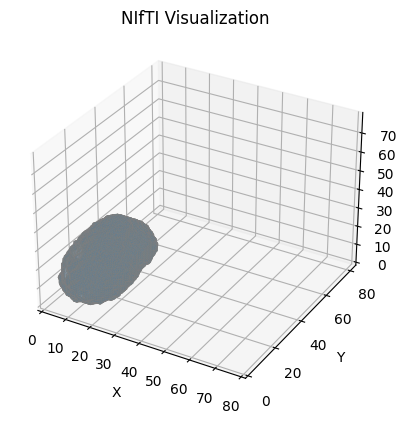

In [4]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage.measure import marching_cubes


def visualize_nifti(nifti_path):
    # Load the NIfTI file
    img = nib.load(nifti_path)
    data = img.get_fdata()

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Extract the coordinates of the voxels
    x, y, z = np.where(data > 0)

    # Create a voxel grid
    grid = np.zeros(data.shape)
    grid[x, y, z] = 1

    # Identify the surfaces of the voxels
    verts, faces, _, _ = marching_cubes(grid, 0.5)

    # Create a Poly3DCollection
    mesh = Poly3DCollection(verts[faces], alpha=0.4, edgecolor='gray')

    # Add the mesh to the plot
    ax.add_collection3d(mesh)

    # Set the plot limits based on the image dimensions
    ax.set_xlim([0, data.shape[0]])
    ax.set_ylim([0, data.shape[1]])
    ax.set_zlim([0, data.shape[2]])

    # Add labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('NIfTI Visualization')

    # Display the plot
    plt.show()



# Specify the path to your NIfTI file
nifti_path = '../make_database/500um_mixed_n_image.nii'

# Call the function to visualize the NIfTI file
visualize_nifti(nifti_path)
